In [1]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 9.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.0 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have sciki

MNIST - датасет образцов рукописного написания цифр, является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения. Образцы из набора NIST были нормализированы, прошли сглаживание и приведены к серому полутоновому изображению размером 28x28 пикселей.

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Первый элемент и его отклик

5

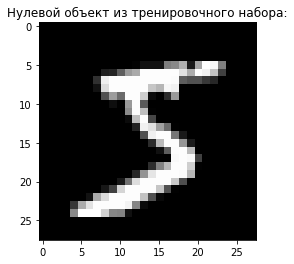

In [3]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")
y_train[0]

Для разделения данных используем функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)


Преобразуем данные

In [5]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)


Уменьшим размерность тестовых данных и найдем долю объясненной дисперсии в зависимости от количества используемых ГК

False
[0.098 0.168 0.23  0.284 0.333 0.375 0.408 0.437 0.464 0.488 0.509 0.53
 0.547 0.564 0.579 0.594 0.608 0.62  0.632 0.644 0.654 0.664 0.674 0.683
 0.692 0.7   0.708 0.716 0.724 0.731 0.737 0.744 0.75  0.756 0.761 0.767
 0.772 0.777 0.781 0.786 0.791 0.795 0.799 0.803 0.807 0.811 0.815 0.818
 0.821 0.825]


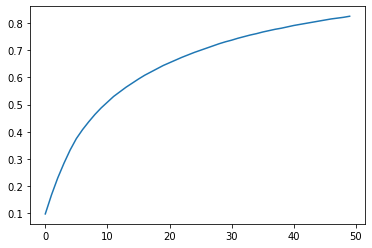

In [6]:
from sklearn.decomposition import PCA
gold_disp = 0.8 + 17 % 10 # необходимая долю объясненной дисперсии
pca = PCA(n_components=50, svd_solver='full') # перебираем n_components, пока один из элементов explained_variance не станет больше gold_disp
modelPCA = pca.fit(X_train) 
X_train = modelPCA.transform(X_train)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
print(any(i >= gold_disp for i in explained_variance)) # функция, которая выведет True если Д.О.С. достигла нужного значения
print(explained_variance)
plt.plot(np.arange(50), explained_variance, ls = '-')


Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [19]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2022)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [20]:
modelPCA = pca.fit(X_test) 
X_test = modelPCA.transform(X_test)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
CM

array([[1345,    0,   83,   51,    4,   68,   49,   26,   64,    3],
       [   1, 1872,   44,   22,    9,    9,   67,   29,   15,    7],
       [  57,    9,  929,   76,   60,   67,  394,   15,  144,   12],
       [  23,    5,   56, 1506,   17,   84,    4,   31,  117,   30],
       [   8,   11,   57,    5, 1380,   17,   50,   30,   79,  119],
       [ 125,    4,  175,  237,   60,  596,   17,   57,  298,   22],
       [  29,   24,  902,   31,   31,   21,  593,   29,   82,   24],
       [  58,   38,   16,   15,   55,   31,   79, 1448,   50,   96],
       [  22,   27,  104,  404,   61,  402,   30,   25,  585,  113],
       [  24,   11,   28,   55,  413,   45,   47,  180,  200,  821]])

Число объектов класс 0 отнесенных к классу _[номер в списке]_%9

In [21]:
var_class = 17 % 9
CM[var_class][var_class]

585

Определите Accuracy, Precision, Recall или F1 для обученной модели

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1693
           1       0.94      0.90      0.92      2075
           2       0.39      0.53      0.45      1763
           3       0.63      0.80      0.70      1873
           4       0.66      0.79      0.72      1756
           5       0.44      0.37      0.41      1591
           6       0.45      0.34      0.38      1766
           7       0.77      0.77      0.77      1886
           8       0.36      0.33      0.34      1773
           9       0.66      0.45      0.53      1824

    accuracy                           0.62     18000
   macro avg       0.61      0.61      0.60     18000
weighted avg       0.62      0.62      0.61     18000

